Подключение модулей и загрузка данных

In [134]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter=";")

Просмотр заголовка данных

In [135]:
print(df.head())

     ID                                           EDU_NAME  global_id  \
0  8236  Государственное бюджетное общеобразовательное ...  797946035   
1  8237  Государственное казенное общеобразовательное у...  797949150   
2  8238  Государственное казенное общеобразовательное у...  797949275   
3  8239  Частное учреждение общеобразовательная организ...  797949425   
4  8240  Автономная некоммерческая организация средняя ...  797949570   

        YEAR                           AdmArea                   District  \
0  2016-2017  Восточный административный округ          район Богородское   
1  2016-2017  Восточный административный округ          район Богородское   
2  2016-2017  Восточный административный округ              район Вешняки   
3  2016-2017  Восточный административный округ              район Вешняки   
4  2016-2017  Восточный административный округ  район Восточное Измайлово   

   PASSES_OVER_220  PASSER_UNDER_160  Unnamed: 8  
0                5                19         Na

Преобразование данных по Округу и Району:
- сокращение подписей
- назначение полей как категорий для более быстрого процесса группировки
Удаление из Района "район ", а из Округа - все слова, кроме 1го

In [136]:
df['District']=df['District'].str.replace("район ","").astype('category')
df['AdmArea']=df['AdmArea'].apply(lambda x:x.split(" ")[0]).astype('category')

Выставление индекса по году и фильтрование по индексу, чтобы получить данные за 2018-2019 гг. со сбросом индекса

In [137]:
df=df.set_index('YEAR').loc['2018-2019'].reset_index()

Проверка полученных данных

In [138]:
print(df.head())

        YEAR    ID                                           EDU_NAME  \
0  2018-2019  9734  Государственное бюджетное общеобразовательное ...   
1  2018-2019  9735  Государственное бюджетное общеобразовательное ...   
2  2018-2019  9736  Государственное бюджетное общеобразовательное ...   
3  2018-2019  9737  Автономная некоммерческая организация средняя ...   
4  2018-2019  9738  Государственное бюджетное общеобразовательное ...   

    global_id    AdmArea      District  PASSES_OVER_220  PASSER_UNDER_160  \
0  1011905064  Восточный   Богородское               41               112   
1  1011905068  Восточный  Метрогородок               12                44   
2  1011905069  Восточный   Новогиреево               19                37   
3  1011905070  Восточный    Сокольники                1                 3   
4  1011905071   Западный    Крылатское               25                51   

   Unnamed: 8  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


Вывод 2х круговых диаграммм в одну строку:
1. Данные по округам по PASSES_OVER_220 сгруппированные по Округам с выводом суммы на круговой диаграмме
2. Данные по СЗАО

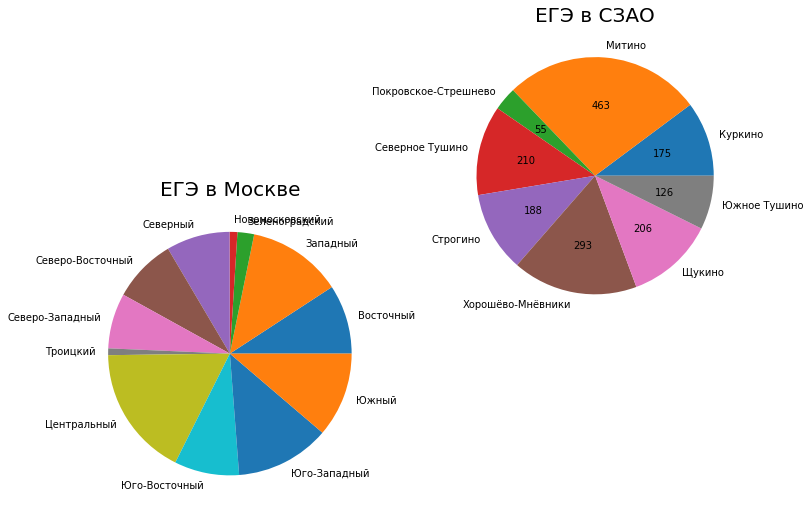

In [141]:
fig=plt.figure(figsize=(12,12))
area=fig.add_subplot(1,2,1)
area.set_title('ЕГЭ в Москве', fontsize=20)
data_adm=df.set_index('AdmArea')
data_adm['PASSES_OVER_220'].groupby('AdmArea').sum().plot.pie(ax=area,label="")

area=fig.add_subplot(2,2,2)
area.set_title('ЕГЭ в СЗАО', fontsize=20)
data_district=data_adm.loc['Северо-Западный'].reset_index().set_index('District')
data_district=data_district['PASSES_OVER_220'].groupby('District').sum()
data_district.plot.pie(ax=area,label="",autopct=lambda p:f'{p*sum(data_district)/100:.0f}')
plt.show()